In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

**Name:** _Marcel Damas_   
**E-Mail:** _marcel-spanien@hotmail.de_ 

## Project goal 

Our goal is to give the company a better overview of the questions in order to be able to draw important conclusions that help the company in its development and to solve problems better. 

   
<a name="table_of_contents"></a> 

## Table of contents  

**Instructions for completing the project**  

**Step 1. Download the data and prepare it for analysis**  

Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type. [click here](#Step_1)   

[Download dataset](https://practicum.yandex.com/learn/practicum100-da/courses/dbb59211-715a-4dd3-b81c-eae2a2c20e65/sprints/4615/topics/0bcf4b0a-31d1-43f1-8f51-0033b339e743/lessons/7c5a32e5-bfbd-4f5b-8235-5a3dacc73e5f/)


File paths:  

    /datasets/visits_log_us.csv.  
    /datasets/orders_log_us.csv.  
    /datasets/costs_us.csv.  

**Step 2. Make reports and calculate metrics:**  

1. Product
* How many people use it every day, week, and month? [click here](#Step_2.1)  
* How many sessions are there per day? (One user might have more than one session.) [click here](#Step_2.2)  
* What is the length of each session? [click here](#Step_2.3)  
* How often do users come back? [click here](#Step_2.4)  
       
2. Sales
*  When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.) [click here](#Step_2.5)    
*  How many orders do they make during a given period of time? [click here](#Step_2.6)     
*  What is the average purchase size? [click here](#Step_2.7)    
*  How much money do they bring? (LTV) [click here](#Step_2.8)   

3. Marketing  
*  How much money was spent? Overall/per source/over time [click here](#Step_2.9)   
*  How much did customer acquisition from each of the sources cost?  [click here](#Step_2.10) 
*  How worthwhile where the investments? (ROI)  [click here](#Step_2.11) 

Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

**Step 3. Write a conclusion: advise marketing experts how much money to invest and where.**  
What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

In [210]:
try:
    visits = pd.read_csv('visits_log_us.csv', dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
    orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
    costs = pd.read_csv('costs_us.csv',parse_dates=['dt'])
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
    costs = pd.read_csv('/datasets/costs_us.csv',parse_dates=['dt'])

In [211]:
print('Number of duplicates',orders.duplicated().sum())
print('Number of duplicates',costs.duplicated().sum())
print('Number of duplicates',visits.duplicated().sum())

Number of duplicates 0
Number of duplicates 0
Number of duplicates 0


In [212]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [213]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [214]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<a name="Step_2.1"></a> 
**Step 2. Make reports and calculate metrics:**    
    
1. Product
* How many people use it every day, week, and month? 

Back to the table of contents [click here](#table_of_contents)   

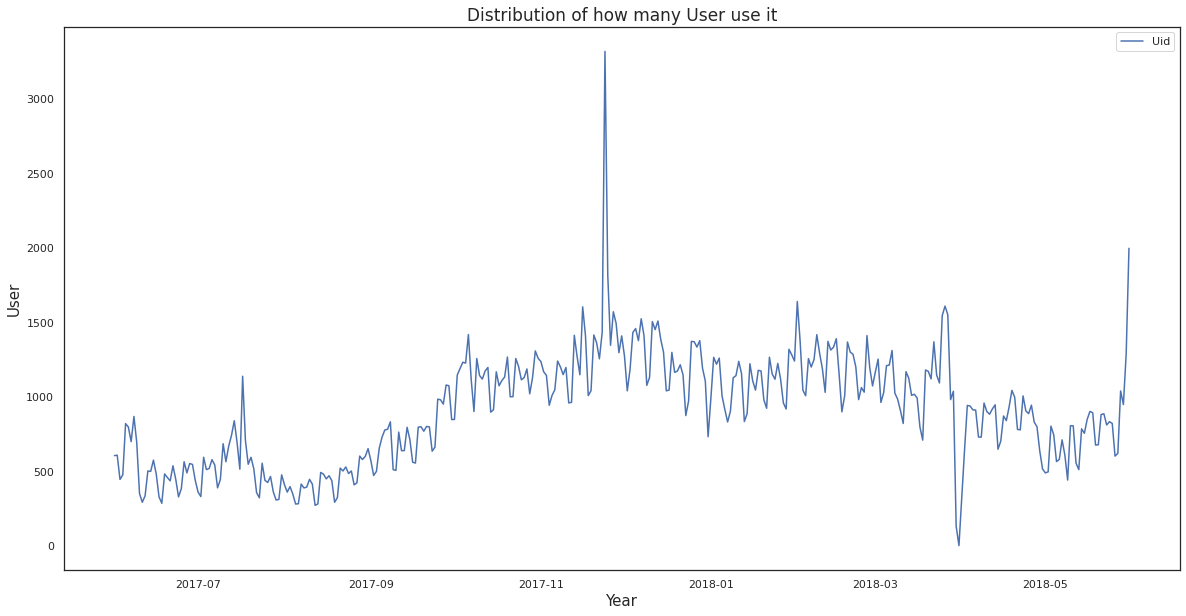

In [215]:
a=visits.groupby(visits["Start Ts"].dt.date)['Uid'].nunique().reset_index()
a.plot.line(x="Start Ts",y="Uid",figsize=(20, 10))
plt.title("Distribution of how many User use it",fontdict={'size':17})
plt.xlabel("Year",fontdict={'size':15})
plt.ylabel("User",fontdict={'size':15})
plt.rc("font", size=15)
plt.legend(ncol=3)
plt.show()

In [216]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

In [217]:
visits['session_year']  = visits['Start Ts'].astype('datetime64[Y]')
visits['session_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['session_week']  = visits['Start Ts'].astype('datetime64[W]')
visits['session_date'] = visits['Start Ts'].astype('datetime64[D]')

In [218]:
mau_total = visits.groupby(['session_year','session_month']).agg({'Uid': 'nunique'})['Uid'].mean()
wau_total = visits.groupby(['session_year','session_week']).agg({'Uid': 'nunique'})['Uid'].mean()
dau_total = visits.groupby(['session_date']).agg({'Uid': 'nunique'})['Uid'].mean()

In [219]:
print("On average we have a monthly number of visitors of:",mau_total)
print("On average we have a weekly number of visitors of:",wau_total)
print("On average we have a daily number of visitors of:",dau_total)

On average we have a monthly number of visitors of: 23228.416666666668
On average we have a weekly number of visitors of: 5621.7037037037035
On average we have a daily number of visitors of: 907.9917582417582


In [220]:
WAU=visits.groupby(['session_week'])['Uid'].nunique().reset_index()
WAU['WAU']= WAU['session_week'].apply(lambda x: x.strftime('%Y-%m'))
display(WAU.head())

,session_week,Uid,WAU
0,2017-06-01,4082,2017-06
1,2017-06-08,3311,2017-06
2,2017-06-15,2844,2017-06
3,2017-06-22,3079,2017-06
4,2017-06-29,3055,2017-06


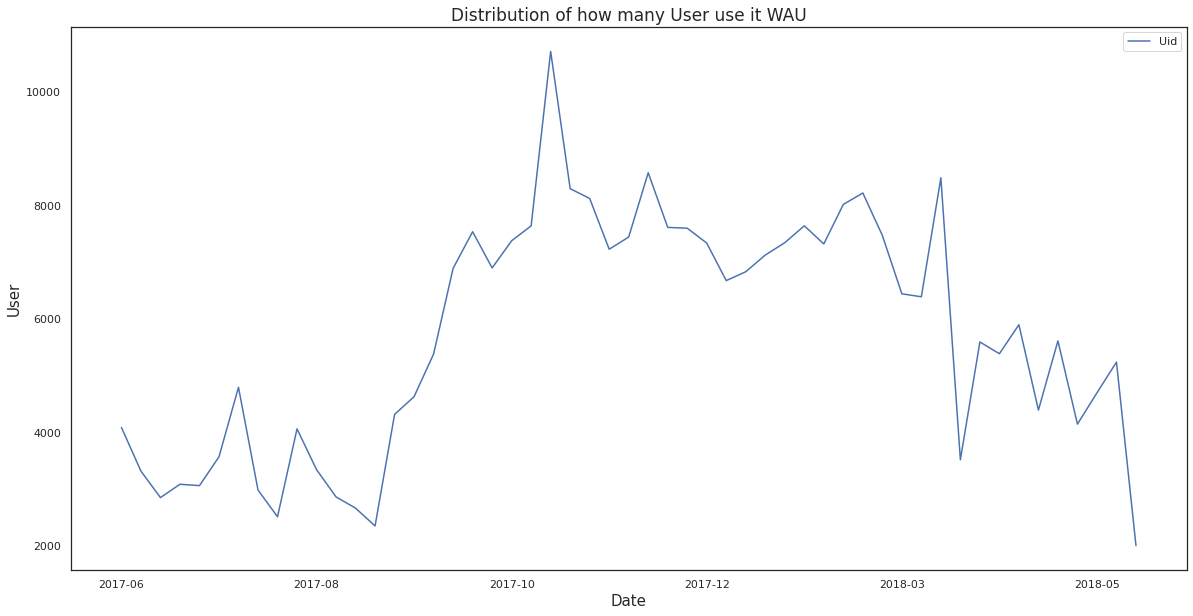

In [221]:
WAU.sort_values(by='WAU', ascending=True).plot.line(x="WAU",y="Uid",figsize=(20, 10))
plt.title("Distribution of how many User use it WAU",fontdict={'size':17})
plt.xlabel("Date",fontdict={'size':15})
plt.ylabel("User",fontdict={'size':15})
plt.rc("font", size=15)
plt.legend(ncol=3)
plt.show()

In [222]:
MAU=visits.groupby(['session_month'])['Uid'].nunique().reset_index()
MAU['MAU']= MAU['session_month'].apply(lambda x: x.strftime('%Y-%m'))
display(MAU.head(12))

,session_month,Uid,MAU
0,2017-06-01,13259,2017-06
1,2017-07-01,14183,2017-07
2,2017-08-01,11631,2017-08
3,2017-09-01,18975,2017-09
4,2017-10-01,29692,2017-10
5,2017-11-01,32797,2017-11
6,2017-12-01,31557,2017-12
7,2018-01-01,28716,2018-01
8,2018-02-01,28749,2018-02
9,2018-03-01,27473,2018-03


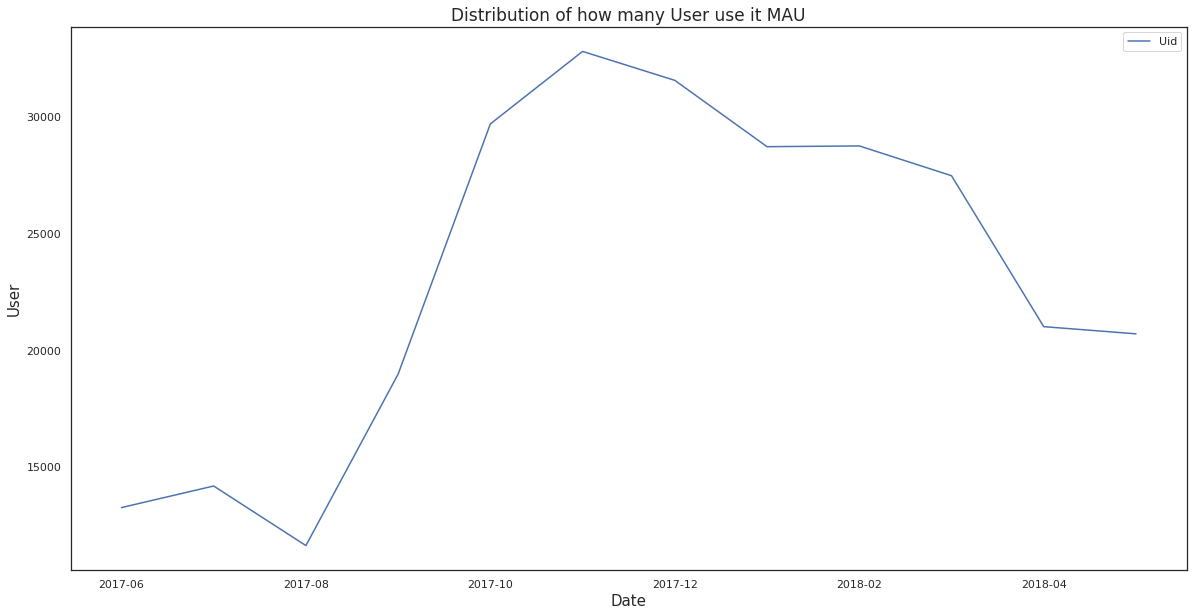

In [223]:
MAU.sort_values(by='MAU', ascending=True).plot.line(x="MAU",y="Uid",figsize=(20, 10))
plt.title("Distribution of how many User use it MAU",fontdict={'size':17})
plt.xlabel("Date",fontdict={'size':15})
plt.ylabel("User",fontdict={'size':15})
plt.rc("font", size=15)
plt.legend(ncol=3)
plt.show()

**Short conclusion:**

If we look at the weekly plot we see that the number of visitors fluctuates the most successful week with the highest number of visitors was the week 26 (2017-11-23) with 10716 visitors. At the end of the graf the graf reached its low point with only 1997 visitors. Now let's take a look at the  numbers of the monthly visitors. Since the numbers are summarized here, they have higher values. The most successful month is november with 32,797 visitors. This is both due to the extremely high number of visitors on 24 Nov 2017, when the number of visitors reached a peak value of 3319 on one day. This outlier has an extreme effect on the values. The high number of visitors can be related to the [Black Friday](https://en.wikipedia.org/wiki/Black_Friday_(shopping)) shopping event this fell 2017 on november 24 th according to wikipedia. At the end of the page is a list with the exact days of the shopping events. 

<a name="Step_2.2"></a> 
**Step 2. Make reports and calculate metrics:**    
    
1. Product  
 
* How many sessions are there per day? (One user might have more than one session.)  

Back to the table of contents [click here](#table_of_contents)   

In [224]:
sessions_per_user = visits.groupby(['session_date']).agg({'Uid': ['count','nunique']})

In [225]:
sessions_per_user.columns = ['n_sessions', 'n_users']

In [226]:
sessions_per_user['sess_per_user'] =sessions_per_user['n_sessions'] / sessions_per_user['n_users']

In [227]:
print("Average conclusion we have now looked at how many people on average :",sessions_per_user['n_sessions'].mean())

Average conclusion we have now looked at how many people on average : 987.3626373626373


In [228]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique().reset_index()['Start Ts'],
                         y=visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique().reset_index()['Uid'],
                        mode='lines',
                        name='DAU',line=dict(color='blue',width=2)))
              
fig.add_trace(go.Scatter(x=visits.groupby(visits['Start Ts'].dt.date)['Uid'].count().reset_index()['Start Ts'],
                         y=visits.groupby(visits['Start Ts'].dt.date)['Uid'].count().reset_index()['Uid'],
                        mode='lines',
                        name='sesseions',line=dict(color='green',width=2)))    
              
fig.update_layout(
    showlegend=True,
    plot_bgcolor='grey',
    margin=dict(t=10,l=10,b=10,r=10)
)             
fig.update_layout(title='Sessions per day')              
fig.show()

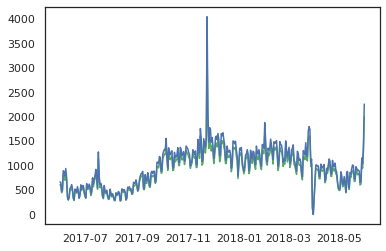

In [229]:
plt.plot(visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique().reset_index()['Start Ts'],
                         visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique().reset_index()['Uid'], color='g')

plt.plot(visits.groupby(visits['Start Ts'].dt.date)['Uid'].count().reset_index()['Start Ts'],
                         visits.groupby(visits['Start Ts'].dt.date)['Uid'].count().reset_index()['Uid'], color='b')    

plt.show()

In [230]:
sessions_per_user.head(10)

,n_sessions,n_users,sess_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
2017-06-06,875,797,1.097867
2017-06-07,788,699,1.127325
2017-06-08,939,868,1.081797
2017-06-09,755,695,1.086331


In [231]:
print('We have a total number of sessions',sessions_per_user['n_sessions'].sum(),'and total number of users',sessions_per_user['n_users'].sum())

print('Total sessions',sessions_per_user['n_sessions'].sum(),'/','Total users',sessions_per_user['n_users'].sum(),'=',sessions_per_user['n_sessions'].sum()/sessions_per_user['n_users'].sum())

We have a total number of sessions 359400 and total number of users 330509
Total sessions 359400 / Total users 330509 = 1.0874136559064957


**Conclusion**  

We have now looked at conclusion we have now looked at the number of sessions on average the number is 987. Apparently, it looks like an average of 79 people visit the site more than once a day. Per user the average visit to the page is 1.0822 times.

<a name="Step_2.3"></a>
**Step 2. Make reports and calculate metrics:**

1. Product

* What is the length of each session? 

Back to the table of contents [click here](#table_of_contents)   

In [232]:
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
display(visits.head())
print("On average, users spent",visits['session_duration_sec'].mean(),"seconds on the site.")

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


On average, users spent 643.506488592098 seconds on the site.


Seems like it worked! But let's have a quick look whether the distribution is normal or whether we have to enrich the asl (average session length).

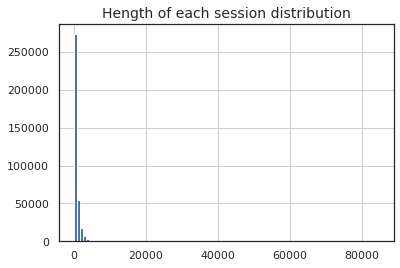

In [233]:
visits['session_duration_sec'].hist(bins=100);
plt.title("Hength of each session distribution",fontdict={'size':14});

When the distribution is normal or close to normal, we can take the mean or median. But in this case it's impossible, so we need the average session length with mode.

In [234]:
asl = visits['session_duration_sec'].mode()
print("The average session length is:",asl)

The average session length is: 0    60
dtype: int64


In [235]:
visits['session_length'] = ((pd.to_datetime(visits['End Ts'])-visits['Start Ts'])/np.timedelta64(1, 'm')).round()
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,0.0


**Conclusion**

We have determined the average length of the users in seconds that they spent on the platform. It amounts to an average time of 60 seconds per user. And in session length the length of the setions is given.   

<a name=Step_2.4></a>
**Step 2. Make reports and calculate metrics:**  

1. Product
 
* How often do users come back? 

Back to the table of contents [click here](#table_of_contents)    

One possible way of assessing whether customers come back is the glue factor, which gives you information about if the customers remain bound.

In [236]:
sticky_mau = (dau_total/mau_total)*100
sticky_wau = (dau_total/wau_total)*100
print("The weekly sticky factor is",sticky_wau,"%") 
print("and")
print("The monthly sticky factor is",sticky_mau,"%") 

The weekly sticky factor is 16.151540637823956 %
and
The monthly sticky factor is 3.908969652437603 %


If we application has a 16% sticky, that means that for every new user we bring in, we have a 16% shot at turning them into a weekly user and with 3.9% chancer that we turn a customer into a monthly customer .

In [237]:
min_visit=visits.groupby(['Uid'])['Start Ts'].min().reset_index()
min_visit.rename(columns={'Start Ts':'First visit'},inplace=True)
min_visit.head()

,Uid,First visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [238]:
retention=visits.merge(min_visit[['Uid', 'First visit']],on=['Uid'],how='left')
retention.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,session_length,First visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,18.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,28.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,24.0,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,0.0,2017-12-27 14:06:00


In [239]:
retention['cohort']=retention['First visit'].apply(lambda x: x.strftime('%Y-%m'))
retention.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,session_length,First visit,cohort
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,18.0,2017-12-20 17:20:00,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,28.0,2018-02-19 16:53:00,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,0.0,2017-07-01 01:54:00,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,24.0,2018-03-09 20:05:00,2018-03
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,0.0,2017-12-27 14:06:00,2017-12


In [240]:
retention['age']=retention['Start Ts']-retention['First visit']
retention.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,session_length,First visit,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,18.0,2017-12-20 17:20:00,2017-12,0 days 00:00:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,28.0,2018-02-19 16:53:00,2018-02,0 days 00:00:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,0.0,2017-07-01 01:54:00,2017-07,0 days 00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,24.0,2018-03-09 20:05:00,2018-03,71 days 14:54:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,0.0,2017-12-27 14:06:00,2017-12,0 days 00:00:00


In [241]:
retention['age']=retention['age'] / np.timedelta64(1,'M')
retention['age']=retention['age'].round()
retention['age']=retention['age'].astype(int)
retention.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,session_length,First visit,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,18.0,2017-12-20 17:20:00,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,28.0,2018-02-19 16:53:00,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,0.0,2017-07-01 01:54:00,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,24.0,2018-03-09 20:05:00,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,0.0,2017-12-27 14:06:00,2017-12,0


In [242]:
pd.pivot_table(retention,index='cohort', columns='age',values='Uid', aggfunc='nunique')

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06,13259.0,986.0,710.0,813.0,921.0,880.0,847.0,740.0,743.0,661.0,550.0,526.0,176.0
2017-07,13140.0,747.0,680.0,705.0,743.0,640.0,591.0,645.0,489.0,383.0,321.0,71.0,NaN
2017-08,10181.0,705.0,629.0,602.0,522.0,426.0,423.0,345.0,297.0,234.0,33.0,NaN,NaN
2017-09,16704.0,1278.0,1110.0,826.0,669.0,663.0,554.0,429.0,334.0,43.0,NaN,NaN,NaN
2017-10,25977.0,1911.0,1367.0,996.0,949.0,808.0,549.0,464.0,85.0,NaN,NaN,NaN,NaN
2017-11,27248.0,1894.0,1260.0,1058.0,861.0,655.0,506.0,72.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1300.0,1034.0,735.0,546.0,409.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,1219.0,812.0,584.0,389.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,1070.0,590.0,403.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
cohort_users=retention.groupby('cohort').nunique()['Uid'].reset_index()

In [244]:
cohort_users=retention.groupby('cohort').nunique()['Uid'].reset_index()

In [245]:
cohort_users=cohort_users.rename(columns={'Uid':'cohort_users'})
cohort_users

,cohort,cohort_users
0,2017-06,13259
1,2017-07,13140
2,2017-08,10181
3,2017-09,16704
4,2017-10,25977
5,2017-11,27248
6,2017-12,25268
7,2018-01,22624
8,2018-02,22197
9,2018-03,20589


In [246]:
retention.head(3)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,session_length,First visit,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,18.0,2017-12-20 17:20:00,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,28.0,2018-02-19 16:53:00,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,0.0,2017-07-01 01:54:00,2017-07,0


In [247]:
retention=retention.merge(cohort_users,on='cohort')

In [248]:
retention.head(1)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,session_length,First visit,cohort,age,cohort_users
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,18.0,2017-12-20 17:20:00,2017-12,0,25268


In [249]:
retention_pivot = pd.pivot_table(retention,index='cohort', columns='age',values='Uid', aggfunc='nunique')
retention_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06,13259.0,986.0,710.0,813.0,921.0,880.0,847.0,740.0,743.0,661.0,550.0,526.0,176.0
2017-07,13140.0,747.0,680.0,705.0,743.0,640.0,591.0,645.0,489.0,383.0,321.0,71.0,NaN
2017-08,10181.0,705.0,629.0,602.0,522.0,426.0,423.0,345.0,297.0,234.0,33.0,NaN,NaN
2017-09,16704.0,1278.0,1110.0,826.0,669.0,663.0,554.0,429.0,334.0,43.0,NaN,NaN,NaN
2017-10,25977.0,1911.0,1367.0,996.0,949.0,808.0,549.0,464.0,85.0,NaN,NaN,NaN,NaN
2017-11,27248.0,1894.0,1260.0,1058.0,861.0,655.0,506.0,72.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1300.0,1034.0,735.0,546.0,409.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,1219.0,812.0,584.0,389.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,1070.0,590.0,403.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


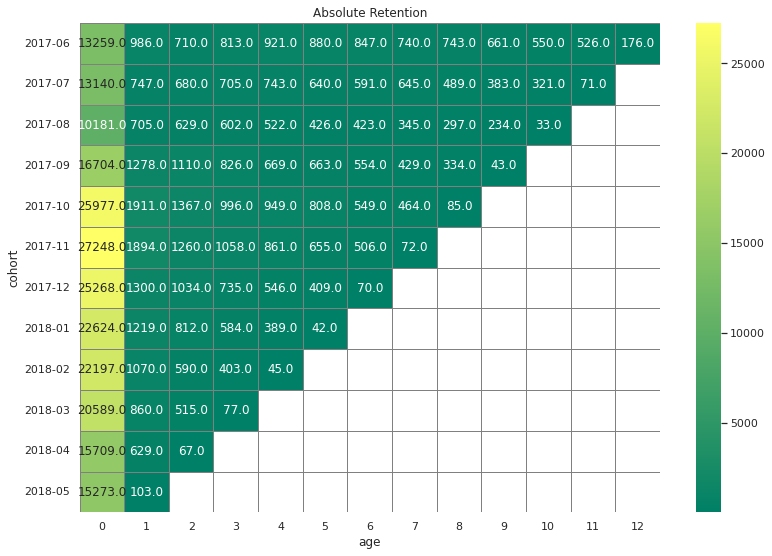

In [250]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Absolute Retention')
sns.heatmap(retention_pivot , annot=True, fmt='.1f', linewidths=1, linecolor='gray',cmap = 'summer');

In [251]:
retention.head(1)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,session_length,First visit,cohort,age,cohort_users
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,18.0,2017-12-20 17:20:00,2017-12,0,25268


In [252]:
cohorts = retention.groupby(['cohort','age']).agg({'Uid':'nunique'}).reset_index()
cohorts.head()

,cohort,age,Uid
0,2017-06,0,13259
1,2017-06,1,986
2,2017-06,2,710
3,2017-06,3,813
4,2017-06,4,921


In [253]:
initial_users_count = cohorts[cohorts['age'] == 0][['cohort','Uid']]
initial_users_count.head()

,cohort,Uid
0,2017-06,13259
13,2017-07,13140
25,2017-08,10181
36,2017-09,16704
46,2017-10,25977


In [254]:
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='cohort')
cohorts.head()

,cohort,age,Uid,cohort_users
0,2017-06,0,13259,13259
1,2017-06,1,986,13259
2,2017-06,2,710,13259
3,2017-06,3,813,13259
4,2017-06,4,921,13259


In [255]:
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users'] 
cohorts

,cohort,age,Uid,cohort_users,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,986,13259,0.074365
2,2017-06,2,710,13259,0.053549
3,2017-06,3,813,13259,0.061317
4,2017-06,4,921,13259,0.069462
...,...,...,...,...,...
85,2018-04,0,15709,15709,1.000000
86,2018-04,1,629,15709,0.040041
87,2018-04,2,67,15709,0.004265
88,2018-05,0,15273,15273,1.000000


In [256]:
retention_pivot_ = cohorts.pivot_table(index='cohort',columns='age',values='retention',aggfunc='sum')
print(retention_pivot_)

age       0         1         2         3         4         5         6   \
cohort                                                                     
2017-06  1.0  0.074365  0.053549  0.061317  0.069462  0.066370  0.063881   
2017-07  1.0  0.056849  0.051750  0.053653  0.056545  0.048706  0.044977   
2017-08  1.0  0.069247  0.061782  0.059130  0.051272  0.041843  0.041548   
2017-09  1.0  0.076509  0.066451  0.049449  0.040050  0.039691  0.033166   
2017-10  1.0  0.073565  0.052623  0.038342  0.036532  0.031104  0.021134   
2017-11  1.0  0.069510  0.046242  0.038829  0.031599  0.024038  0.018570   
2017-12  1.0  0.051448  0.040921  0.029088  0.021608  0.016186  0.002770   
2018-01  1.0  0.053881  0.035891  0.025813  0.017194  0.001856       NaN   
2018-02  1.0  0.048205  0.026580  0.018156  0.002027       NaN       NaN   
2018-03  1.0  0.041770  0.025013  0.003740       NaN       NaN       NaN   
2018-04  1.0  0.040041  0.004265       NaN       NaN       NaN       NaN   
2018-05  1.0

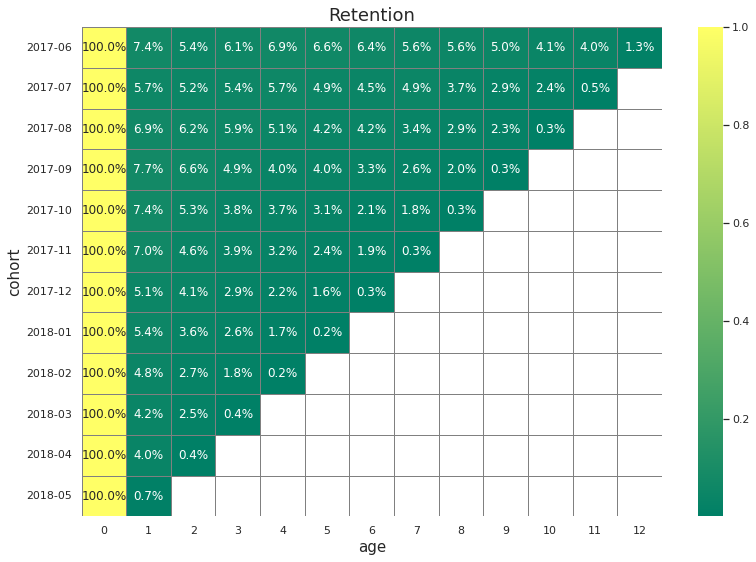

In [257]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention',fontdict={'size':18})
plt.xlabel("Month",fontdict={'size':15})
plt.ylabel("Age",fontdict={'size':15}) 
sns.heatmap(retention_pivot_ , annot=True, fmt='.1%', linewidths=1, linecolor='gray',cmap = 'summer');

**Conclusion**

we calculated the absolute retention rate and the retention rate and presented them in a headmap 

<a name=Step_2.5></a>
**Step 2. Make reports and calculate metrics:**    

2. Sales

*  When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)    

Back to the table of contents [click here](#table_of_contents)   

In [258]:
conversion_data = orders.merge(retention[['Uid','First visit']],on=['Uid'],how='left')
conversion_data['cohort'] = conversion_data['First visit'].apply(lambda x: x.strftime('%Y-%m'))
conversion_data

,Buy Ts,Revenue,Uid,First visit,cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06
...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10


In [259]:
conversion_data['conversion_date']= ((conversion_data['Buy Ts']-conversion_data['First visit'])/np.timedelta64(1, 'D')).astype(int)
conversion_data

,Buy Ts,Revenue,Uid,First visit,cohort,conversion_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06,0
...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10,220
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10,220
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10,220
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10,220


In [260]:
actual_conversion=conversion_data.groupby(['Uid'])['conversion_date'].min().reset_index()
actual_conversion.rename(columns={'conversion_date':'actual_conversion'},inplace=True)
actual_conversion.head()

,Uid,actual_conversion
0,313578113262317,106
1,1575281904278712,0
2,2429014661409475,0
3,2464366381792757,0
4,2551852515556206,0


In [261]:
conversion_data = conversion_data.merge(actual_conversion,how='left',on=['Uid'])
conversion_data

,Buy Ts,Revenue,Uid,First visit,cohort,conversion_date,actual_conversion
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06,0,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06,0,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06,0,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06,0,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06,0,0
...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10,220,220
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10,220,220
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10,220,220
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10,220,220


In [262]:
conversion_list=[0,1,2,7,14,30]
def conversion(conversion_day,group_by):
    grouped=(conversion_data.query('actual_conversion<=@conversion_day').groupby(group_by)['Uid'].nunique()\
    /retention.groupby(group_by)['Uid'].nunique())*100
    grouped=grouped.reset_index().rename(columns={'Uid':'Conversion_{}%'.format(conversion_day)})
    return grouped

In [263]:
conversion(7,'cohort')

,cohort,Conversion_7%
0,2017-06,14.948337
1,2017-07,12.960426
2,2017-08,11.727728
3,2017-09,13.302203
4,2017-10,14.147130
5,2017-11,12.041251
6,2017-12,13.376603
7,2018-01,11.549682
8,2018-02,12.654863
9,2018-03,12.569819


In [264]:
new_conversion=[]
for i in conversion_list:
    new_conversion.append(conversion(i,'cohort'))

In [265]:
new_conversion=pd.concat(new_conversion,axis=1)
new_conversion=new_conversion.loc[:,~new_conversion.columns.duplicated()]

In [266]:
new_conversion.style.set_table_styles([{'selector': 'th','props':[('background','#7CAE00'),
                                                                 ('color','whete'),
                                                                 ('font-family','verdana')]},
                                      {'selector': 'td',
                                      'props':[('font-family','verdana')]},
 
                                      ]
                                     ).hide_index()

cohort,Conversion_0%,Conversion_1%,Conversion_2%,Conversion_7%,Conversion_14%,Conversion_30%
2017-06,13.605853,14.020665,14.224300,14.948337,15.325439,16.057018
2017-07,11.613394,12.062405,12.343988,12.960426,13.340944,13.744292
2017-08,10.774973,11.040173,11.177684,11.727728,12.042039,12.670661
2017-09,11.769636,12.194684,12.428161,13.302203,13.799090,14.661159
2017-10,12.711245,13.165493,13.434962,14.147130,14.574431,15.278901
2017-11,10.518203,11.050352,11.318262,12.041251,12.639460,13.336759
2017-12,11.841064,12.335761,12.604876,13.376603,13.796106,14.306633
2018-01,10.281117,10.696605,10.930870,11.549682,11.907709,12.482320
2018-02,11.181691,11.609677,11.943055,12.654863,13.019777,13.515340
2018-03,11.506144,11.899558,12.103550,12.569819,12.904949,13.308077


**Conclusion** 

we have calculated and displayed the conversion rate to show when people started buying. 

<a name=Step_2.6></a>
**Step 2. Make reports and calculate metrics:**    

2. Sales
*  How many orders do they make during a given period of time?  

Back to the table of contents [click here](#table_of_contents) 

In [267]:
v2 = visits.groupby('Uid')['Source Id'].nunique().reset_index()
conversion_data = conversion_data.merge(v2,on=['Uid'],how='left')
conversion_data.head()

,Buy Ts,Revenue,Uid,First visit,cohort,conversion_date,actual_conversion,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06,0,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06,0,0,1
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06,0,0,1
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06,0,0,1
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06,0,0,1


In [268]:
orders_ = orders.merge(conversion_data[['Uid','Source Id','cohort']].drop_duplicates(),on=['Uid'],how='left')
orders_.head()

,Buy Ts,Revenue,Uid,Source Id,cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,1,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,1,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,1,2017-06


In [269]:
orders_time=orders_.groupby(['cohort','Source Id'])['Buy Ts'].count().reset_index().rename(columns={'Buy Ts':'orders'})
orders_time

,cohort,Source Id,orders
0,2017-06,1,1600
1,2017-06,2,1285
2,2017-06,3,821
3,2017-06,4,706
4,2017-06,5,1801
...,...,...,...
67,2018-04,5,50
68,2018-05,1,1961
69,2018-05,2,435
70,2018-05,3,57


**conclusion** 

In the purchase size we see how large the number of purchases is in a given period of time. 

<a name=Step_2.7></a>
**Step 2. Make reports and calculate metrics:**  

2. Sales
*  What is the average purchase size?    

Back to the table of contents [click here](#table_of_contents)   

In [270]:
print('Average purchase size',orders['Revenue'].mean())

Average purchase size 4.999646930476993


In [271]:
orders_.head()

,Buy Ts,Revenue,Uid,Source Id,cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,1,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,1,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,1,2017-06


In [272]:
AVG_orders_purchase=orders_.groupby(['cohort','Buy Ts','Revenue']).agg({'Buy Ts':'count','Revenue':'mean'}).rename(columns={'Buy Ts':'orders','Revenue':'purchase size'}).reset_index()
AVG_orders_purchase.head()

,cohort,Buy Ts,Revenue,orders,purchase size
0,2017-06,2017-06-01 00:10:00,17.00,1,17.00
1,2017-06,2017-06-01 00:25:00,0.55,1,0.55
2,2017-06,2017-06-01 00:27:00,0.37,1,0.37
3,2017-06,2017-06-01 00:29:00,0.55,1,0.55
4,2017-06,2017-06-01 07:58:00,0.37,1,0.37


In [273]:
AVG_orders_purchase.groupby(['cohort','orders'])['purchase size'].mean().reset_index().head(15)

,cohort,orders,purchase size
0,2017-06,1,6.260443
1,2017-06,2,0.760000
2,2017-07,1,5.022559
3,2017-07,2,5.468750
4,2017-08,1,5.105914
5,2017-08,2,1.340000
6,2017-09,1,7.758737
7,2017-09,2,3.145000
8,2017-10,1,4.482751
9,2017-10,2,1.507857


<a name=Step_2.8></a>
**Step 2. Make reports and calculate metrics:**  

2. Sales
*  How much money do they bring? (LTV)   

Back to the table of contents [click here](#table_of_contents)   

In [274]:
orders.head(1)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


In [275]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [276]:
first_orders = orders.groupby('Uid').agg({'Buy Ts': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.head()

,Uid,first_order_month
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [277]:
first_orders['first_order_month']=first_orders['first_order_month'].astype('datetime64[M]')
first_orders

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [278]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [279]:
margin_rate = .4 #example margin rate

In [280]:
orders_

,Buy Ts,Revenue,Uid,Source Id,cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,1,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,1,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,1,2017-06
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,1,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,1,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,1,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,3,2017-10


In [281]:
orders_ = pd.merge(orders,first_orders, on='Uid')
orders_['order_month']=orders_['Buy Ts'].astype('datetime64[M]')
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [282]:
report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012


In [283]:
result_margin_rate = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum')
result_margin_rate

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.889766,0.194131,0.175055,0.381869,0.409012,0.294201,0.380176,0.232637,0.221285,0.242315,0.228504,0.102742
2017-07-01,2.404087,0.134084,0.249412,0.143590,0.070717,0.062419,0.048083,0.056728,0.064493,0.058858,0.062269,NaN
2017-08-01,2.110607,0.188797,0.183393,0.156511,0.197620,0.113416,0.084266,0.162003,0.116885,0.075191,NaN,NaN
2017-09-01,2.257812,0.447034,0.208372,1.590317,0.160223,0.258827,0.280643,0.097260,0.073602,NaN,NaN,NaN
2017-10-01,2.001493,0.214305,0.076558,0.062858,0.060624,0.048145,0.033926,0.046188,NaN,NaN,NaN,NaN
2017-11-01,2.061873,0.159693,0.079823,0.129981,0.059205,0.021552,0.045971,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.895276,0.104150,0.370039,0.426110,0.125172,0.135219,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.654254,0.117903,0.121712,0.057111,0.025079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.662795,0.111310,0.031406,0.029658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


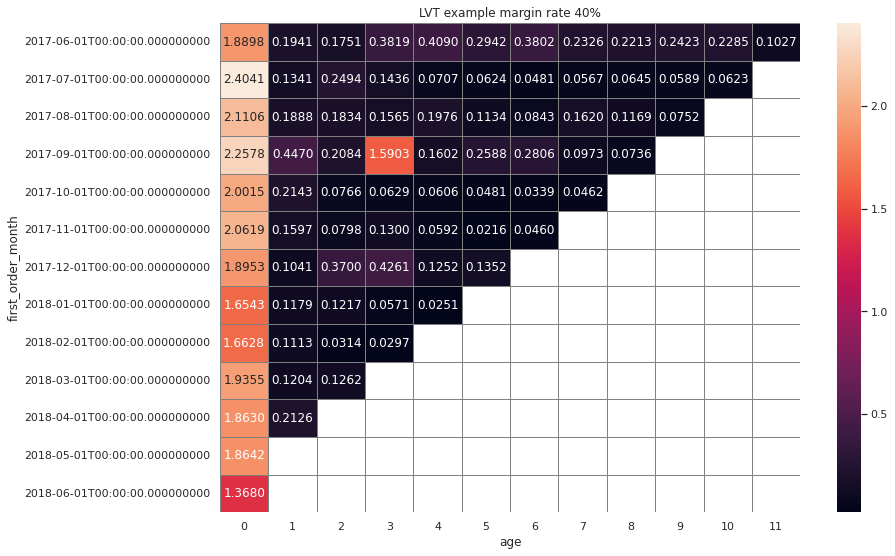

In [284]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LVT example margin rate 40%')
sns.heatmap(result_margin_rate , annot=True, fmt='.4f', linewidths=1,linecolor='gray');

In [285]:
result_margin_rate_cumsum = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum').cumsum(axis=1)
result_margin_rate_cumsum

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.889766,2.083897,2.258952,2.640821,3.049833,3.344034,3.724210,3.956846,4.178131,4.420447,4.648951,4.751694
2017-07-01,2.404087,2.538172,2.787584,2.931174,3.001891,3.064310,3.112393,3.169121,3.233614,3.292472,3.354742,NaN
2017-08-01,2.110607,2.299404,2.482797,2.639308,2.836928,2.950345,3.034610,3.196613,3.313498,3.388689,NaN,NaN
2017-09-01,2.257812,2.704846,2.913218,4.503535,4.663758,4.922585,5.203228,5.300488,5.374091,NaN,NaN,NaN
2017-10-01,2.001493,2.215798,2.292356,2.355214,2.415838,2.463982,2.497909,2.544097,NaN,NaN,NaN,NaN
2017-11-01,2.061873,2.221566,2.301389,2.431370,2.490575,2.512126,2.558098,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.895276,1.999426,2.369465,2.795575,2.920747,3.055965,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.654254,1.772158,1.893870,1.950981,1.976060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.662795,1.774105,1.805511,1.835168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


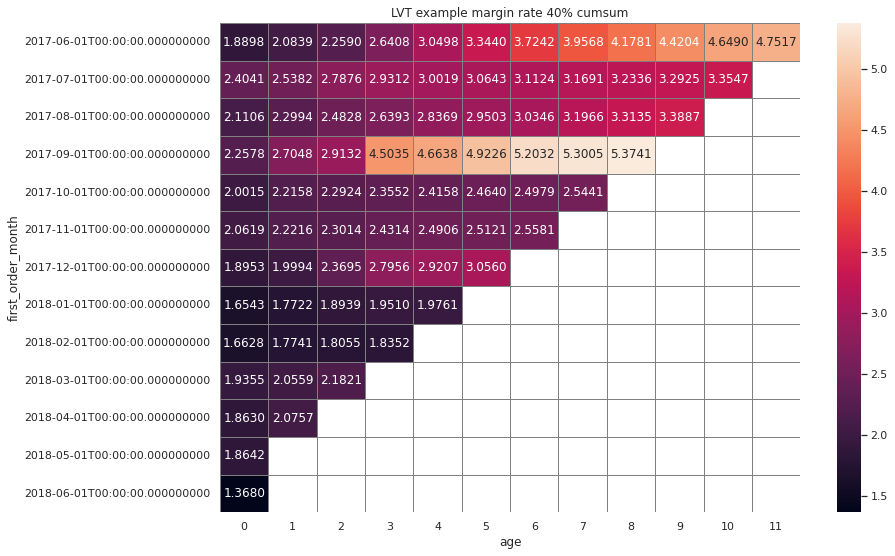

In [286]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LVT example margin rate 40% cumsum')
sns.heatmap(result_margin_rate_cumsum , annot=True, fmt='.4f', linewidths=1,linecolor='gray');

In [287]:
report['ltv without margin rate'] = report['Revenue'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,ltv without margin rate
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,4.724414
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,0.485329
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,1.022531


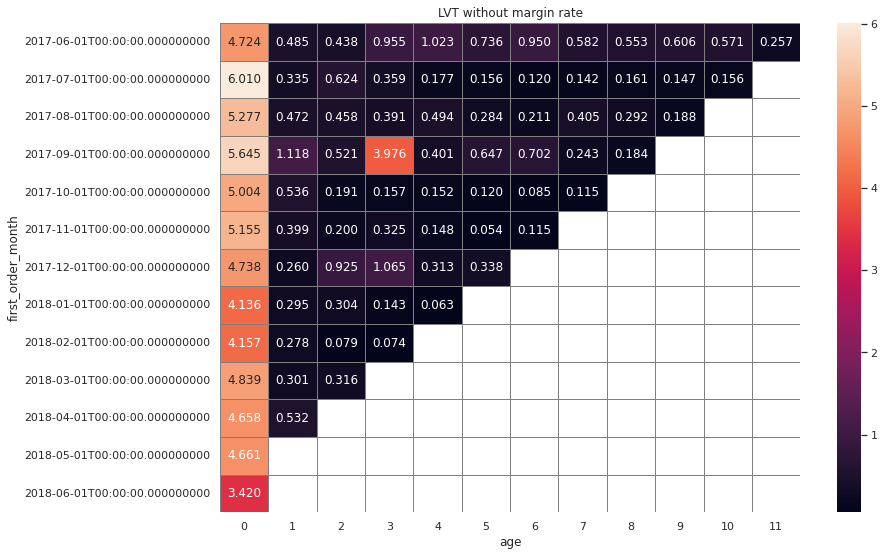

In [288]:
result_without_margin_rate  = report.pivot_table(index='first_order_month', columns='age', values='ltv without margin rate', aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LVT without margin rate')
sns.heatmap(result_without_margin_rate , annot=True, fmt='.3f', linewidths=1,linecolor='gray');

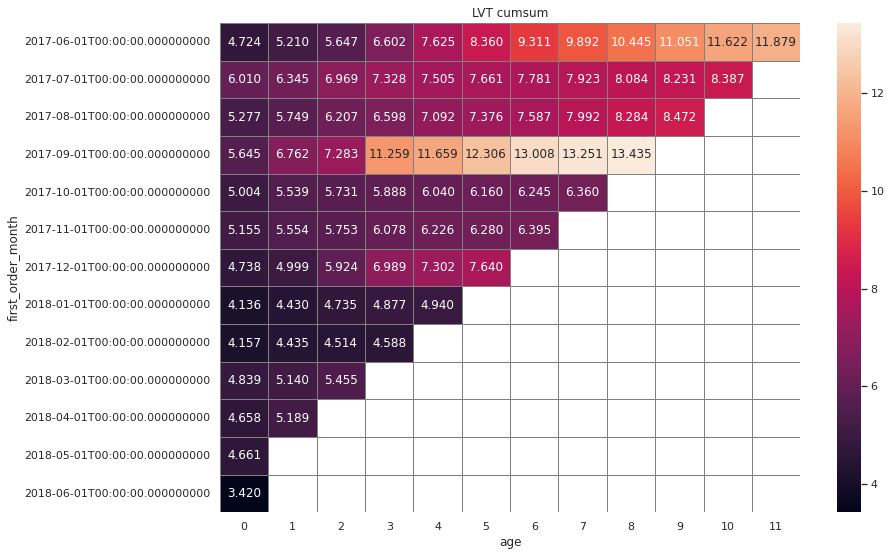

In [289]:
result_without_margin_rate_cumsum  = report.pivot_table(index='first_order_month', columns='age', values='ltv without margin rate', aggfunc='sum').cumsum(axis=1)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LVT cumsum')
sns.heatmap(result_without_margin_rate_cumsum , annot=True, fmt='.3f', linewidths=1,linecolor='gray');

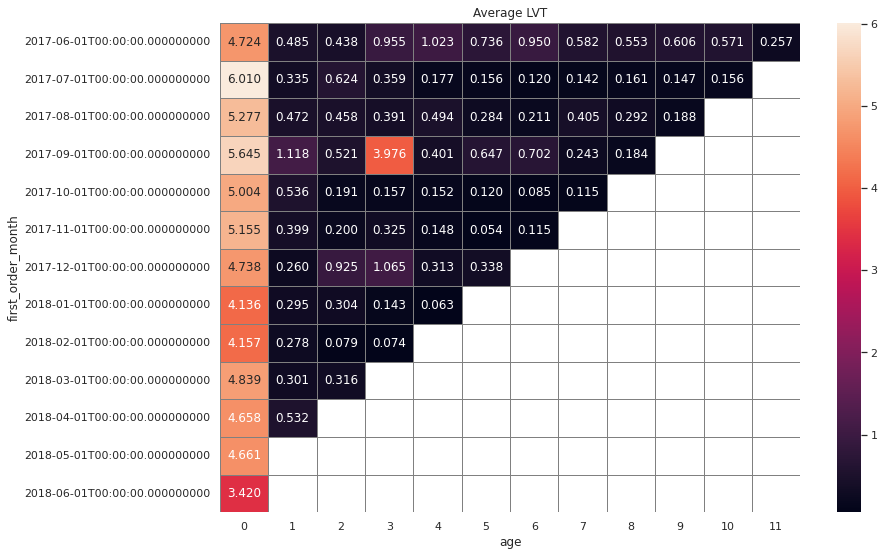

In [290]:
avg_result_without_margin_rate  = report.pivot_table(index='first_order_month', columns='age', values='ltv without margin rate', aggfunc='mean')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Average LVT')
sns.heatmap(avg_result_without_margin_rate , annot=True, fmt='.3f', linewidths=1,linecolor='gray');

**Conclusion**

I calculated the LTV with an example margin rate of 40% and calculated it without a margin rate since we don't have any. I also displayed the heatmat with cumsum to show how it adds up 

<a name=Step_2.9></a>
**3. Marketing**    

*  How much money was spent? Overall/per source/over time   

Back to the table of contents [click here](#table_of_contents)   

In [291]:
print("The total cost overall are:",costs["costs"].sum())

The total cost overall are: 329131.62


In [292]:
print("The total overall costcosts per source are:",costs.groupby("source_id")["costs"].sum())

The total overall costcosts per source are: source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


In [293]:
cost_by_dt=costs.groupby(['dt'])['costs'].sum().reset_index().rename(columns={'dt':'first_visits'})
cost_by_dt

,first_visits,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44
...,...,...
359,2018-05-27,532.87
360,2018-05-28,619.44
361,2018-05-29,784.79
362,2018-05-30,1183.00


**conclusion**


here we have presented the costs in different forms. 

<a name=Step_2.10></a>
**3. Marketing**    

*  How much did customer acquisition from each of the sources cost?  

Back to the table of contents [click here](#table_of_contents)   

In [294]:
costs.rename(columns={'source_id':'Source Id'},inplace=True)
costs.head()

,Source Id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [295]:
CAC_by_source = costs.groupby(['Source Id'])['costs'].sum().reset_index().merge(conversion_data.groupby(['Source Id'])['Uid'].nunique().reset_index(),on='Source Id',how='left')
CAC_by_source['CAC_per_user']=CAC_by_source['costs']/CAC_by_source['Uid']
CAC_by_source

,Source Id,costs,Uid,CAC_per_user
0,1,20833.27,22441.0,0.928357
1,2,42806.04,9347.0,4.579656
2,3,141321.63,3270.0,43.217624
3,4,61073.60,1079.0,56.602039
4,5,51757.10,321.0,161.237072
5,9,5517.49,NaN,NaN
6,10,5822.49,NaN,NaN


We want to calculate the CAC. CAC = (customer acquisition cost) the cost of attracting a customer—the money a new customer costs a company. 

In [296]:
CAC_by_source = costs.groupby(['Source Id'])['costs'].sum().reset_index().merge(visits.groupby(['Source Id'])['Uid'].nunique().reset_index(),on='Source Id',how='left')
CAC_by_source['CAC_per_user']=CAC_by_source['costs']/CAC_by_source['Uid']
CAC_by_source

,Source Id,costs,Uid,CAC_per_user
0,1,20833.27,18999,1.096546
1,2,42806.04,26245,1.631017
2,3,141321.63,74756,1.890439
3,4,61073.60,83525,0.731201
4,5,51757.10,56974,0.908434
5,9,5517.49,9264,0.595584
6,10,5822.49,8067,0.721766


Costs for attracting the visits by Source id.

In [297]:
user_first_visit= conversion_data.groupby([conversion_data['First visit'].dt.date])['Uid'].nunique().reset_index()
user_first_visit['First visit']= user_first_visit['First visit'].astype(str)
user_first_visit.head()

,First visit,Uid
0,2017-06-01,170
1,2017-06-02,148
2,2017-06-03,90
3,2017-06-04,106
4,2017-06-05,222


In [298]:
cost_by_dt= costs.groupby(['dt'])['costs'].sum().reset_index().rename(columns={'dt':'First visit'})
cost_by_dt.head()

,First visit,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44


In [299]:
print(user_first_visit.iloc[0]['First visit'])

2017-06-01


In [300]:
print(cost_by_dt.iloc[0]['First visit'])

2017-06-01 00:00:00


In [301]:
cost_by_dt['First visit']=cost_by_dt['First visit'].apply(lambda x: x.strftime('%Y-%m-%d'))
cost_by_dt.head()

,First visit,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44


In [302]:
print(cost_by_dt.iloc[0]['First visit'])

2017-06-01


In [303]:
CAC_by_date=cost_by_dt.merge(user_first_visit, on='First visit',how='left')
CAC_by_date['CAC']=CAC_by_date['costs']/CAC_by_date['Uid']
CAC_by_date

,First visit,costs,Uid,CAC
0,2017-06-01,735.26,170.0,4.325059
1,2017-06-02,721.19,148.0,4.872905
2,2017-06-03,450.85,90.0,5.009444
3,2017-06-04,761.16,106.0,7.180755
4,2017-06-05,821.44,222.0,3.700180
...,...,...,...,...
359,2018-05-27,532.87,53.0,10.054151
360,2018-05-28,619.44,101.0,6.133069
361,2018-05-29,784.79,87.0,9.020575
362,2018-05-30,1183.00,170.0,6.958824


**Conclusion**

we calculated the cac per day 

<a name=Step_2.11></a>
3. Marketing    

*  How worthwhile where the investments? (ROI)   

Back to the table of contents [click here](#table_of_contents)   

In [304]:
costs.rename(columns={'Source Id':'source_id'},inplace=True)

In [305]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [306]:
visits['Source Id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

In [307]:
set(costs['source_id'].unique())^set(visits['Source Id'].unique())

{6, 7}

In [308]:
for i in [1, 2]:
    print(f'Source number {i}')
    cost_by_dt = costs.query('source_id==@i')\
                        .groupby(['dt'])['costs']\
                        .sum()\
                        .reset_index()\
                        .rename(columns={'dt':'First visit'})
    cost_by_dt['First visit']=cost_by_dt['First visit'].apply(lambda x: x.strftime('%Y-%m-%d'))



    user_first_visit = conversion_data[conversion_data['Source Id']==i]\
                                    .groupby([conversion_data['First visit'].dt.date])['Uid']\
                                    .nunique()\
                                    .reset_index()
    user_first_visit['First visit']= user_first_visit['First visit'].astype(str)
    CAC_by_date=cost_by_dt.merge(user_first_visit, on='First visit',how='left')
    CAC_by_date['CAC']=CAC_by_date['costs']/CAC_by_date['Uid']

    orders_ = pd.merge(orders,first_orders, on='Uid', how='inner')
    orders_['order_month']=orders_['Buy Ts'].astype('datetime64[M]')
    cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()

    report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
    report['gp'] = report['Revenue'] * margin_rate
    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['gp'] / report['n_buyers']
    report['ltv without margin rate'] = report['Revenue'] / report['n_buyers']


    report['romi'] =  report['ltv'] / CAC_by_date['CAC']
    output = report.pivot_table(index='first_order_month',columns='age', values='romi',aggfunc='mean')
    output_ = output.cumsum(axis=1).round(2).fillna('')
    display(output_)

Source number 1


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.61,1.81,2.03,2.35,2.98,3.74,4.81,5.28,5.62,5.76,5.95,6.02
2017-07-01,2.10,2.23,2.51,2.67,2.75,2.76,2.82,2.87,2.97,3.09,3.17,
2017-08-01,7.28,7.52,7.75,7.87,8.12,8.27,8.38,9.19,9.27,9.46,,
2017-09-01,2.40,3.21,3.64,5.05,5.17,5.34,5.82,6.0,6.06,,,
2017-10-01,2.84,3.11,3.22,3.26,3.33,3.39,3.42,3.51,,,,
2017-11-01,2.79,2.95,3.01,3.09,3.21,3.23,3.37,,,,,
2017-12-01,1.21,1.42,1.6,1.97,2.04,2.14,,,,,,
2018-01-01,2.07,2.18,2.28,2.36,2.39,,,,,,,
2018-02-01,0.74,0.89,0.93,0.96,,,,,,,,


Source number 2


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.64,0.71,0.75,0.9,1.13,1.25,1.47,1.57,1.66,1.74,1.81,1.83
2017-07-01,0.66,0.74,0.87,0.93,0.96,0.98,0.99,1.0,1.01,1.03,1.06,
2017-08-01,0.81,0.86,0.91,0.95,1.0,1.02,1.04,1.09,1.13,1.15,,
2017-09-01,0.56,0.71,0.79,1.21,1.24,1.31,1.51,1.52,1.54,,,
2017-10-01,0.72,0.79,0.81,0.83,0.85,0.87,0.89,0.9,,,,
2017-11-01,0.79,0.8,0.84,0.88,0.9,0.91,0.91,,,,,
2017-12-01,0.57,0.59,0.66,0.77,0.8,0.84,,,,,,
2018-01-01,0.53,0.55,0.57,0.59,0.6,,,,,,,
2018-02-01,0.41,0.44,0.45,0.46,,,,,,,,


In [309]:
for i in [1,  2,  3,  4,  5,  9, 10]:
    print(f'Source number {i}')

    cost_by_dt = costs.query('source_id==@i')\
                        .groupby(['dt'])['costs']\
                        .sum()\
                        .reset_index()\
                        .rename(columns={'dt':'First visit'})
    cost_by_dt['First visit']=cost_by_dt['First visit'].apply(lambda x: x.strftime('%Y-%m-%d'))

    user_first_visit = conversion_data[conversion_data['Source Id']==i]\
                                    .groupby([conversion_data['First visit'].dt.date])['Uid']\
                                    .nunique()\
                                    .reset_index()
    
    
    user_first_visit['First visit']= user_first_visit['First visit'].astype(str)
    CAC_by_date=cost_by_dt.merge(user_first_visit, on='First visit',how='left')
    CAC_by_date['CAC']=CAC_by_date['costs']/CAC_by_date['Uid']

    orders_ = pd.merge(orders,first_orders, on='Uid', how='inner')
    orders_['order_month']=orders_['Buy Ts'].astype('datetime64[M]')
    cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()

    report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
    report['gp'] = report['Revenue'] * margin_rate
    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['gp'] / report['n_buyers']
    report['ltv without margin rate'] = report['Revenue'] / report['n_buyers']


    report['romi'] =  report['ltv'] / CAC_by_date['CAC']
    output = report.pivot_table(index='first_order_month',columns='age', values='romi',aggfunc='mean')
    output_ = output.cumsum(axis=1).round(2).fillna('')
    display(output_)

Source number 1


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.61,1.81,2.03,2.35,2.98,3.74,4.81,5.28,5.62,5.76,5.95,6.02
2017-07-01,2.10,2.23,2.51,2.67,2.75,2.76,2.82,2.87,2.97,3.09,3.17,
2017-08-01,7.28,7.52,7.75,7.87,8.12,8.27,8.38,9.19,9.27,9.46,,
2017-09-01,2.40,3.21,3.64,5.05,5.17,5.34,5.82,6.0,6.06,,,
2017-10-01,2.84,3.11,3.22,3.26,3.33,3.39,3.42,3.51,,,,
2017-11-01,2.79,2.95,3.01,3.09,3.21,3.23,3.37,,,,,
2017-12-01,1.21,1.42,1.6,1.97,2.04,2.14,,,,,,
2018-01-01,2.07,2.18,2.28,2.36,2.39,,,,,,,
2018-02-01,0.74,0.89,0.93,0.96,,,,,,,,


Source number 2


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.64,0.71,0.75,0.9,1.13,1.25,1.47,1.57,1.66,1.74,1.81,1.83
2017-07-01,0.66,0.74,0.87,0.93,0.96,0.98,0.99,1.0,1.01,1.03,1.06,
2017-08-01,0.81,0.86,0.91,0.95,1.0,1.02,1.04,1.09,1.13,1.15,,
2017-09-01,0.56,0.71,0.79,1.21,1.24,1.31,1.51,1.52,1.54,,,
2017-10-01,0.72,0.79,0.81,0.83,0.85,0.87,0.89,0.9,,,,
2017-11-01,0.79,0.8,0.84,0.88,0.9,0.91,0.91,,,,,
2017-12-01,0.57,0.59,0.66,0.77,0.8,0.84,,,,,,
2018-01-01,0.53,0.55,0.57,0.59,0.6,,,,,,,
2018-02-01,0.41,0.44,0.45,0.46,,,,,,,,


Source number 3


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.11,0.13,0.14,0.16,0.19,0.21,0.24,0.25,0.26,0.27,0.28,0.29
2017-07-01,0.58,0.59,0.6,0.6,0.6,0.61,0.61,0.62,0.62,0.62,0.62,
2017-08-01,0.11,0.12,0.13,0.14,0.15,0.16,0.16,0.18,0.18,0.18,,
2017-09-01,0.07,0.08,0.09,0.15,0.16,0.16,0.17,0.18,0.18,,,
2017-10-01,0.12,0.12,0.13,0.13,0.13,0.14,0.14,0.14,,,,
2017-11-01,0.03,0.03,0.04,0.04,0.04,0.04,0.04,,,,,
2017-12-01,0.12,0.12,0.13,0.14,0.14,0.15,,,,,,
2018-01-01,0.03,0.04,0.05,0.05,0.05,,,,,,,
2018-02-01,0.04,0.04,0.04,0.04,,,,,,,,


Source number 4


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.44,0.46,0.48,0.5,0.77,2.62,2.7,2.71,2.71,2.74,2.74,2.74
2017-07-01,0.24,0.25,0.26,0.26,,0.26,0.27,0.27,0.27,0.27,0.27,
2017-08-01,0.07,0.07,0.09,0.1,0.1,0.12,0.12,0.14,0.14,0.14,,
2017-09-01,0.17,0.2,0.21,0.8,,0.82,0.85,0.86,0.86,,,
2017-10-01,0.3,0.31,0.31,0.33,0.33,0.33,0.33,0.33,,,,
2017-11-01,0.06,0.07,0.08,0.09,0.09,0.09,0.09,,,,,
2017-12-01,0.03,0.04,0.07,0.07,0.08,0.08,,,,,,
2018-01-01,0.01,,,0.01,0.02,,,,,,,
2018-02-01,0.25,0.25,0.25,0.25,,,,,,,,


Source number 5


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.36,0.37,0.38,0.41,0.43,0.43,0.45,0.45,0.46,,0.47,0.47
2017-07-01,0.06,0.06,0.07,0.07,0.08,,0.08,0.08,0.08,,,
2017-08-01,0.04,0.04,0.05,0.05,0.05,0.06,0.06,0.06,0.07,0.07,,
2017-09-01,0.02,0.03,,0.06,0.06,0.06,0.07,0.07,,,,
2017-10-01,0.08,0.08,0.08,0.08,0.08,0.08,,0.08,,,,
2017-11-01,0.03,,0.04,0.04,0.04,0.04,,,,,,
2017-12-01,,,,0.01,0.01,,,,,,,
2018-01-01,0.03,0.03,,,,,,,,,,
2018-02-01,,,0.0,0.0,,,,,,,,


Source number 9


age
first_order_month


Source number 10


age
first_order_month


In [310]:
 for i in [1,  2,  3,  4,  5,  9, 10]:
    print(f'Source number {i}')

    cost_by_dt = costs.query('source_id==@i')\
                        .groupby(['dt'])['costs']\
                        .sum()\
                        .reset_index()\
                        .rename(columns={'dt':'First visit'})
    cost_by_dt['First visit']=cost_by_dt['First visit'].apply(lambda x: x.strftime('%Y-%m-%d'))

    user_first_visit = conversion_data[conversion_data['Source Id']==i]\
                                    .groupby([conversion_data['First visit'].dt.date])['Uid']\
                                    .nunique()\
                                    .reset_index()
    
    user_first_visit['First visit']= user_first_visit['First visit'].astype(str)
    CAC_by_date=cost_by_dt.merge(user_first_visit, on='First visit',how='left')
    CAC_by_date['CAC']=CAC_by_date['costs']/CAC_by_date['Uid']

    orders_ = pd.merge(orders,first_orders, on='Uid', how='inner')
    orders_['order_month']=orders_['Buy Ts'].astype('datetime64[M]')
    cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()

    report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
    report['gp'] = report['Revenue'] * margin_rate
    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['gp'] / report['n_buyers']
    report['ltv without margin rate'] = report['Revenue'] / report['n_buyers']


    report['romi'] =  report['ltv'] / CAC_by_date['CAC']
    output = report.pivot_table(index='first_order_month',columns='age', values='romi',aggfunc='mean').cumsum(axis=1)
    output_ = output.cumsum(axis=1).round(2).fillna('')
    display(output_)


Source number 1


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.61,3.42,5.45,7.8,10.78,14.52,19.32,24.6,30.22,35.99,41.94,47.96
2017-07-01,2.10,4.33,6.85,9.51,12.26,15.02,17.83,20.7,23.68,26.77,29.93,
2017-08-01,7.28,14.8,22.55,30.43,38.55,46.82,55.2,64.38,73.65,83.11,,
2017-09-01,2.40,5.61,9.25,14.3,19.46,24.8,30.62,36.62,42.68,,,
2017-10-01,2.84,5.95,9.17,12.43,15.76,19.15,22.57,26.08,,,,
2017-11-01,2.79,5.73,8.74,11.84,15.05,18.28,21.65,,,,,
2017-12-01,1.21,2.63,4.22,6.19,8.22,10.37,,,,,,
2018-01-01,2.07,4.26,6.54,8.9,11.29,,,,,,,
2018-02-01,0.74,1.63,2.56,3.51,,,,,,,,


Source number 2


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.64,1.35,2.11,3.0,4.13,5.38,6.85,8.42,10.08,11.83,13.63,15.47
2017-07-01,0.66,1.41,2.28,3.21,4.17,5.14,6.13,7.14,8.15,9.18,10.24,
2017-08-01,0.81,1.68,2.59,3.54,4.54,5.55,6.6,7.68,8.81,9.96,,
2017-09-01,0.56,1.27,2.06,3.27,4.51,5.83,7.34,8.86,10.4,,,
2017-10-01,0.72,1.51,2.32,3.15,4.01,4.88,5.77,6.66,,,,
2017-11-01,0.79,1.6,2.44,3.32,4.22,5.12,6.04,,,,,
2017-12-01,0.57,1.16,1.82,2.59,3.39,4.23,,,,,,
2018-01-01,0.53,1.09,1.66,2.25,2.85,,,,,,,
2018-02-01,0.41,0.85,1.3,1.76,,,,,,,,


Source number 3


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.11,0.24,0.38,0.54,0.73,0.94,1.18,1.43,1.69,1.96,2.24,2.53
2017-07-01,0.58,1.16,1.76,2.36,2.97,3.57,4.18,4.79,5.41,6.03,6.65,
2017-08-01,0.11,0.23,0.36,0.5,0.65,0.81,0.97,1.15,1.32,1.51,,
2017-09-01,0.07,0.15,0.24,0.39,0.55,0.71,0.89,1.07,1.25,,,
2017-10-01,0.12,0.24,0.37,0.49,0.63,0.77,0.9,1.05,,,,
2017-11-01,0.03,0.05,0.09,0.13,0.17,0.21,0.25,,,,,
2017-12-01,0.12,0.24,0.37,0.51,0.65,0.8,,,,,,
2018-01-01,0.03,0.07,0.12,0.17,0.23,,,,,,,
2018-02-01,0.04,0.08,0.12,0.16,,,,,,,,


Source number 4


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.44,0.91,1.39,1.89,2.65,5.27,7.97,10.68,13.39,16.13,18.87,21.62
2017-07-01,0.24,0.49,0.75,1.01,,1.27,1.54,1.81,2.09,2.36,2.63,
2017-08-01,0.07,0.15,0.24,0.34,0.44,0.56,0.68,0.82,0.96,1.1,,
2017-09-01,0.17,0.37,0.58,1.38,,2.2,3.05,3.9,4.77,,,
2017-10-01,0.3,0.61,0.92,1.24,1.57,1.9,2.23,2.57,,,,
2017-11-01,0.06,0.13,0.22,0.3,0.4,0.49,0.58,,,,,
2017-12-01,0.03,0.07,0.14,0.21,0.29,0.37,,,,,,
2018-01-01,0.01,,,0.02,0.04,,,,,,,
2018-02-01,0.25,0.5,0.75,1.01,,,,,,,,


Source number 5


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.36,0.73,1.1,1.51,1.94,2.37,2.81,3.27,3.73,,4.2,4.67
2017-07-01,0.06,0.12,0.19,0.26,0.34,,0.41,0.49,0.57,,,
2017-08-01,0.04,0.09,0.13,0.18,0.23,0.29,0.35,0.41,0.48,0.55,,
2017-09-01,0.02,0.05,,0.11,0.17,0.23,0.3,0.37,,,,
2017-10-01,0.08,0.16,0.24,0.32,0.4,0.48,,0.57,,,,
2017-11-01,0.03,,0.07,0.11,0.14,0.18,,,,,,
2017-12-01,,,,0.01,0.02,,,,,,,
2018-01-01,0.03,0.06,,,,,,,,,,
2018-02-01,,,0.0,0.0,,,,,,,,


Source number 9


age
first_order_month


Source number 10


age
first_order_month


In order to see it a little more clearly in the interpretation which source is the most important and most successful in terms of the ROI, I applied it again with .cumsum (axis = 1) because it becomes a little clearer that the source id 1 is the one that we get back most of the invested here it is noted that the customers of the cohorte 2017-08-01 had the highest ROI so we should keep an eye on it for the future. Source id 5 was not very successful in the reimbursement of our investments, especially for the customers who came later, it was more of a failure than a success. Source 1 and 4 are also interesting because they were also very successful with the first cohort. With the later ones not quite as great as with the first but okay. 

**Conclusion**

we have calculated the ROMI with the example margin rate and without. 

**General conclusion**

Using the calculated metrics, we were able to show a significantly better overview of the various questions in order to reach better conclusions with them and, if necessary, to better solve and identify problems. 